#### Libras (PTBR Hand Signal Language) Translation Video to Text

In [ ]:
# Manually Classification of each finger to define each signal. It's a huge work and it's probably won't work well
# for most of the cases.

In [23]:
# Ref: https://github.com/google/mediapipe

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp

In [2]:
import sys
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils

In [191]:
def check_hand_orientation(landmarks_list):
    
    orientation = ''
    
    # Hands UP:
    if (landmarks_list[0][2] > landmarks_list[5][2]) & (landmarks_list[0][2] > landmarks_list[9][2]):
        if (landmarks_list[0][2] > landmarks_list[13][2]) & (landmarks_list[0][2] > landmarks_list[17][2]):
            orientation = 'Hands UP'
            
    # Hands DOWN:
    if (landmarks_list[0][2] < landmarks_list[5][2]) & (landmarks_list[0][2] < landmarks_list[9][2]):
        if (landmarks_list[0][2] < landmarks_list[13][2]) & (landmarks_list[0][2] < landmarks_list[17][2]):
            orientation = 'Hands DOWN'
            
    # Hands RIGHT:
    if (landmarks_list[0][1] < landmarks_list[5][1]) & (landmarks_list[0][1] < landmarks_list[9][1]):
        if (landmarks_list[0][1] < landmarks_list[13][1]) & (landmarks_list[0][1] < landmarks_list[17][1]):
            orientation = 'Hand RIGHT'
            
    # Hands LEFT:
    if (landmarks_list[0][1] > landmarks_list[5][1]) & (landmarks_list[0][1] > landmarks_list[9][1]):
        if (landmarks_list[0][1] > landmarks_list[13][1]) & (landmarks_list[0][1] > landmarks_list[17][1]):
            orientation = 'Hand LEFT'
            
    return orientation

In [192]:
mpDraw = mp.solutions.drawing_utils
mpHands = mp.solutions.hands
hands = mpHands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.6, min_tracking_confidence=0.6)

In [193]:
thumb         = [1, 2, 3, 4]
index_finger  = [5, 6, 7, 8]
middle_finger = [9, 10, 11, 12]
ring_finger   = [13, 14, 15, 16]
pinky_finger  = [17, 18, 19, 20]

In [ ]:
# Load Video:
video = 'libras_2.mp4'
cap = cv2.VideoCapture(video)
video_fps = cap.get(cv2.CAP_PROP_FPS)

_, first_frame = cap.read()

frame_history = []

for i in range(120):
    frame_history.append(first_frame)
    
history_counter = 0

while True:
    
    start = time.time()
    
    success, frame = cap.read()
        
    if not success:
        print('Server OFF')
        break
            
    saved_frame = frame.copy()
        
    #####################################################################################################################
    
    results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    bboard = np.zeros_like(frame)
    
    if results.multi_hand_landmarks: 
        for handLandmarks in results.multi_hand_landmarks:
            
            landmarks_list = []
            
            for id, lm in enumerate(handLandmarks.landmark):
                h, w, c = frame.shape
                cX, cY  = int(lm.x*w), int(lm.y*h)
                
                cv2.circle(frame, (cX, cY), 6, (205, 0, 0), cv2.FILLED)
                cv2.putText(frame, '{}'.format(id), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (150, 0, 0), 1)
                
                cv2.circle(bboard, (cX, cY), 6, (205, 0, 0), cv2.FILLED)
                cv2.putText(bboard, '{}'.format(id), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 1)
                
                landmarks_list.append([id, cX, cY])
    
            orientation = check_hand_orientation(landmarks_list)
        
            text = check_fingers(orientation, landmarks_list)
                                            
            mpDraw.draw_landmarks(frame, handLandmarks, mpHands.HAND_CONNECTIONS)
            mpDraw.draw_landmarks(bboard, handLandmarks, mpHands.HAND_CONNECTIONS)
            
            cv2.putText(frame, text, (200, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 155), 2)
            cv2.putText(frame, '{}'.format(orientation), (20, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (150, 0, 0), 2)
            cv2.putText(bboard, '{}'.format(orientation), (20, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
                        
    frame = OpCV_Utils.stackImgs([[frame], [bboard]], scale = 0.5)
                
    #####################################################################################################################
    
    # Save a frame history of the 120 previous frames:
    frame_history[history_counter] = saved_frame
    history_counter +=1
    
    if (history_counter == len(frame_history)):
        history_counter = 0
    
    # Keyboard Controls:
    
    key = cv2.waitKey(1) or 0xff   
        
    if key == ord('k'):
        break
        
    if key == ord('p'):       
        cv2.waitKey(0)
       
    end = time.time()

    frame_time = (end - start) + 0.0001
    fps = np.floor(1/frame_time)
            
    cv2.putText(frame, "FPS: {}".format(fps), (9,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    cv2.imshow("Output", frame)
    
cv2.destroyAllWindows()
cap.release()

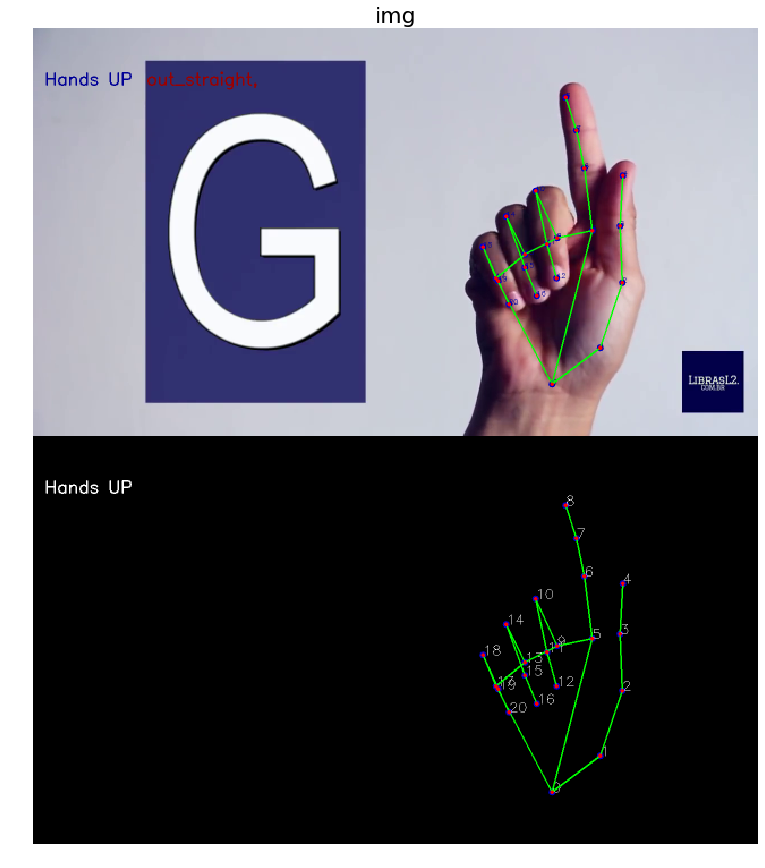

In [222]:
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
OpCV_Utils.show_single_img_plt(img, 'img', fig_size=(15,15))

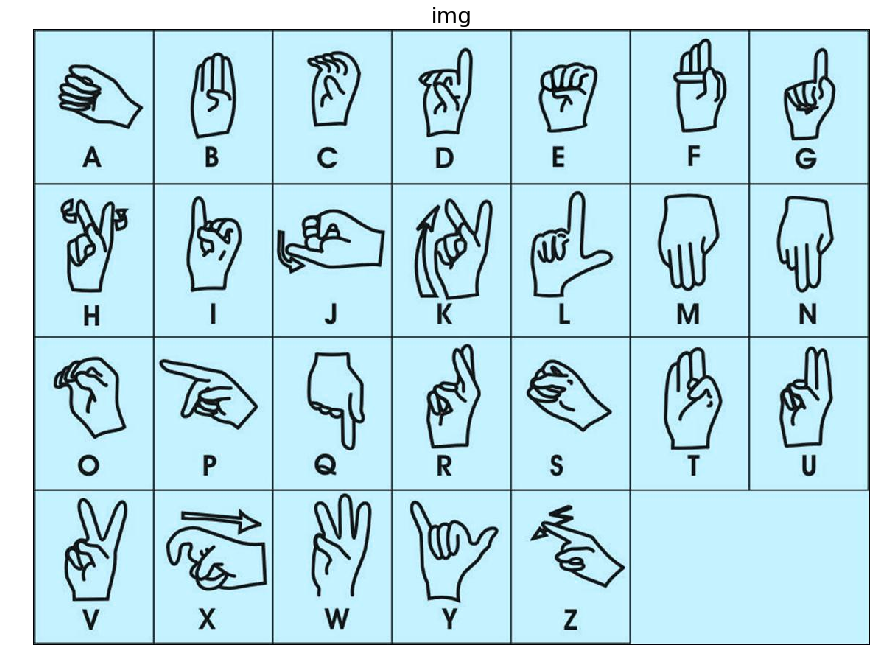

In [224]:
img = cv2.imread('libras.jpeg')
OpCV_Utils.show_single_img_plt(img, 'img', fig_size=(15,15))

In [ ]:
thumb         = [1, 2, 3, 4]
index_finger  = [5, 6, 7, 8]
middle_finger = [9, 10, 11, 12]
ring_finger   = [13, 14, 15, 16]
pinky_finger  = [17, 18, 19, 20]

In [225]:
def check_fingers(orientation, hand):
    
    x, y = 1, 2
    
    thumb  = ''
    index  = ''
    middle = ''
    ring   = ''
    pinky  = ''
    
    if orientation == 'Hands UP':
        
        print('UP')
                
        # thumb:  out_straight, in_closed,     curved, curved_closed, 90_straight,     in_closed_X
        # index:  full_closed,  full_straight, curved, half_closed,   90_straight,     full_straitgh_X, down_X, full_straight_V
        # middle: full_closed,  full_straight, curved, half_closed,   full_straitgh_X, full_straight_V
        # ring:   full_closed,  full_straight, curved, half_closed,   full_straight_V
        # pinky:  full_closed,  full_straight, curved, half_closed
        
        ########################################################################
        if (hand[2][y] > hand[3][y]) & (hand[3][y] > hand[4][y]):
            if (hand[2][x] > hand[5][x]) & (hand[4][x] > hand[5][x]):
                thumb = 'out_straight, '
        ########################################################################
        if (hand[4][y] < hand[2][y]) & (hand[3][y] < hand[2][y]):
            if (hand[5][x] > hand[4][x]) & (hand[5][x] > hand[3][x]):
                thumb = 'in_closed, '
            if (hand[5][x] < hand[4][x]) & (hand[5][x] < hand[3][x]):
                thumb = 'in_closed, '
        ########################################################################
        
        
        
    if orientation == 'Hands DOWN':
        
        # thumb: full_closed, straight_down
        # index:
        # middle:
        # ring:
        # pinky:
        
        pass
        
    if orientation == 'Hand RIGHT':
        pass
        
    if orientation == 'Hand LEFT':
        pass
        
    fingers_state = thumb + index + middle + ring + pinky
    
    return fingers_state

In [ ]:
'''
'A':'out_straight,  full_closed,      full_closed,      full_closed,     full_closed',
'B':'in_closed,     full_straight,    full_straight,    full_straight,   full_straight',
'C':'curved,        curved,           curved,           curved,          curved',
'D':'in_closed,     full_straight,    half_closed,      half_closed,     half_closed',
'E':'in_closed,     half_closed,      half_closed,      half_closed,     half_closed',
'F':'in_closed,     90_straight,      full_straight,    full_straight,   full_straight',
'G':'out_straight,  full_straight,    full_closed,      full_closed,     full_closed',
'H':'---------------------------------------------------------------------------------------',
'I':'in_closed,     full_closed,      full_closed,      full_closed,     full_straight',
'K':'----------------------------------------------------------------------------------------',
'L':'90_straight,   full_straight,    full_closed,      full_closed,     full_closed',
'O':'curved_closed, curved,           curved,           curved,          curved',
'R':'in_closed,     full_straight_X,  full_straight_X,  full_closed,     full_closed',
'T':'in_closed_X,   down_X,           full_straight,    full_straight,   full_straight',
'U':'in_closed,     full_straight,    full_straight,    full_closed,     full_closed',
'V':'in_closed,     full_straight_V,  full_straight_V,  full_closed,     full_closed',
'W':'in_closed,     full_straight_V,  full_straight,    full_straight_V, full_closed',
'Y':'out_straight,  full_closed,      full_closed,      full_closed,     full_straight'


'M':'full_closed,    full_straight,   full_straight,  full_straight,  full_closed',
'N':'full_closed,    full_straight,   full_straight,  half_closed,    full_closed',
'Q':'straight_down,  straight_down,   full_closed,    full_closed,    full_closed'

'A':'out_straight,    full_closed,      full_closed,       full_closed,    full_closed',
'C':'curved,          curved,           curved,            curved,         curved',
'J':'-------------------------------------------------------------------',
'O':'curved_closed,   curved,           curved,            curved,         curved',
'P':'in_closed,       full_straight,    straight_down,     full_closed,    full_closed',
'S':'in_closed,       full_closed,      full_closed,       full_closed,    full_closed',
'X':'-------------------------------------------------------------------',
'Z':'-------------------------------------------------------------------'

'''

In [209]:
def check_letters(orientation, fingers_state):
    
    try:
        ###############################################################################################################
        if orientation == 'Hands UP':
            
            letters_dict = {'A':'out_straight, full_closed, full_closed, full_closed, full_closed',
                            'B':'in_closed, full_straight, full_straight, full_straight, full_straight',
                            'C':'curved, curved, curved, curved, curved',
                            'D':'in_closed, full_straight, half_closed, half_closed, half_closed',
                            'E':'in_closed, half_closed, half_closed, half_closed, half_closed',
                            'F':'in_closed, 90_straight, full_straight, full_straight, full_straight',
                            'G':'out_straight, full_straight, full_closed, full_closed, full_closed',
                            'H':'-------------------------------------------------------------------',
                            'I':'in_closed, full_closed, full_closed, full_closed, full_straight',
                            'K':'-------------------------------------------------------------------',
                            'L':'90_straight, full_straight, full_closed, full_closed, full_closed',
                            'O':'curved_closed, curved, curved, curved, curved',
                            'R':'in_closed, full_straight_X, full_straight_X, full_closed, full_closed',
                            'T':'in_closed_X, down_X, full_straight, full_straight, full_straight',
                            'U':'in_closed, full_straight, full_straight, full_closed, full_closed',
                            'V':'in_closed, full_straight_V, full_straight_V, full_closed, full_closed',
                            'W':'in_closed, full_straight_V, full_straight, full_straight_V, full_closed',
                            'Y':'out_straight, full_closed, full_closed, full_closed, full_straight'}

            letters_dict = dict(map(reversed, letters_dict.items()))
            letter = letters_dict[fingers_state]
            
        ###############################################################################################################
        if orientation == 'Hands DOWN':

            letters_dict = {'M':'full_closed, full_straight, full_straight, full_straight, full_closed',
                            'N':'full_closed, full_straight, full_straight, half_closed, full_closed',
                            'Q':'straight_down, straight_down, full_closed, full_closed, full_closed'}

            letters_dict = dict(map(reversed, letters_dict.items()))
            letter = letters_dict[fingers_state]

        ###############################################################################################################
        if orientation == 'Hand RIGHT':

            letters_dict = {'A':'out_straight, full_closed, full_closed, full_closed, full_closed',
                            'C':'curved, curved, curved, curved, curved',
                            'J':'-------------------------------------------------------------------',
                            'O':'curved_closed, curved, curved, curved, curved',
                            'P':'in_closed, full_straight, straight_down, full_closed, full_closed',
                            'S':'in_closed, full_closed, full_closed, full_closed, full_closed',
                            'X':'-------------------------------------------------------------------',
                            'Z':'-------------------------------------------------------------------'}

            letters_dict = dict(map(reversed, letters_dict.items()))
            letter = letters_dict[fingers_state]

        ###############################################################################################################
        if orientation == 'Hand LEFT':

            letters_dict = {'A':'',
                            'C':'curved, curved, curved, curved, curved',
                            'J':'-------------------------------------------------------------------',
                            'O':'curved_closed, curved, curved, curved, curved',
                            'P':'in_closed, full_straight, straight_down, full_closed, full_closed',
                            'S':'in_closed, full_closed, full_closed, full_closed, full_closed',
                            'X':'-------------------------------------------------------------------',
                            'Z':'-------------------------------------------------------------------'}

            letters_dict = dict(map(reversed, letters_dict.items()))
            letter = letters_dict[fingers_state]
        ###############################################################################################################
        
    except:
        
        print('Could not recognize letter.')
        letter = 'Error'
        
    return letter    

In [210]:
fingers_state = 'in_closed, full_straight, full_straight, full_straight, full_straight'
orientation = 'Hands UP'

k = check_letters(orientation, fingers_state)
print(k)

B
